# Workgroup 5

Authors: Valerie Dube, Erzo Garay, Juan Marcos Guerrero y Matias Villalba

In [ ]:
install.packages("hdm")
install.packages("xtable")
install.packages("randomForest")
install.packages("glmnet")
install.packages("sandwich")
install.packages("xtable")
install.packages("hdm")
install.packages("glmnet")
install.packages("randomForest")
install.packages("rpart")
install.packages("nnet")
install.packages("gbm")
install.packages("rpart.plot")
install.packages("keras")
install.packages("Rtools")
install.packages("ggplot2")
install.packages("WeightIt")
install.packages("cobalt")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

In [ ]:
library(hdm)
library(xtable)
library(randomForest)
library(glmnet)
library(sandwich)
library(rpart)
library(nnet)
library(gbm)
library(rpart.plot)
library(keras)
library(xtable)
library(glmnet)
library(randomForest)
library(ggplot2)
library(WeightIt)
library(cobalt)

## Replication and Data analysis

In [ ]:
set.seed(1)
rm(list = ls())

### 1. Descriptives

#### 1.1. Descriptive table

In [ ]:
# Import data and see first observations
#data = read.csv("../../data/processed_esti.csv")
data <- read.csv('/content/processed_esti.csv')
head(data)

,y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,0,1,0,0,0,1,0,0,0,1,0,27,5
2,0,0,0,1,0,0,0,0,0,1,0,0,0,19,6
3,0,1,0,1,0,0,1,0,0,0,0,1,0,26,4
4,0,0,1,0,0,0,0,0,0,1,1,0,0,20,2
5,1,1,1,0,0,1,0,0,0,0,0,1,0,24,3
6,1,1,0,1,0,0,0,0,0,1,0,1,0,24,2


In [ ]:
str(data)

'data.frame':	1739 obs. of  15 variables:
 $ y                       : int  1 0 0 0 1 1 1 0 0 1 ...
 $ w                       : int  1 0 1 0 1 1 1 0 1 1 ...
 $ gender_female           : int  0 0 0 1 1 0 1 0 0 1 ...
 $ gender_male             : int  1 1 1 0 0 1 0 1 1 0 ...
 $ gender_transgender      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ethnicgrp_asian         : int  0 0 0 0 1 0 0 0 0 0 ...
 $ ethnicgrp_black         : int  0 0 1 0 0 0 0 1 0 1 ...
 $ ethnicgrp_mixed_multiple: int  1 0 0 0 0 0 0 0 0 0 ...
 $ ethnicgrp_other         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ethnicgrp_white         : int  0 1 0 1 0 1 1 0 1 0 ...
 $ partners1               : int  0 0 0 1 0 0 0 0 1 0 ...
 $ postlaunch              : int  1 0 1 0 1 1 0 1 0 0 ...
 $ msm                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age                     : int  27 19 26 20 24 24 24 21 27 21 ...
 $ imd_decile              : int  5 6 4 2 3 2 4 2 2 6 ...


In [ ]:
by(data[, !names(data) %in% 'y'], data$w, summary)

data$w: 0
       w     gender_female     gender_male     gender_transgender
 Min.   :0   Min.   :0.0000   Min.   :0.0000   Min.   :0.000000  
 1st Qu.:0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.000000  
 Median :0   Median :1.0000   Median :0.0000   Median :0.000000  
 Mean   :0   Mean   :0.5807   Mean   :0.4181   Mean   :0.001223  
 3rd Qu.:0   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.000000  
 Max.   :0   Max.   :1.0000   Max.   :1.0000   Max.   :1.000000  
 ethnicgrp_asian   ethnicgrp_black   ethnicgrp_mixed_multiple ethnicgrp_other  
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000          Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000          1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000          Median :0.00000  
 Mean   :0.05501   Mean   :0.09291   Mean   :0.09291          Mean   :0.01711  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000          3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0

#### 1.2. Descriptive graphs 

In [ ]:
#Generating propensity score weights for the ATT
w.out <- WeightIt::weightit(w ~ age + gender_male + ethnicgrp_white + partners1 + imd_decile,
                            data = data,
                            method = "glm",
                            estimand = "ATT")

bal.tab(w.out)

Balance Measures
                    Type Diff.Adj
prop.score      Distance  -0.0025
age              Contin.  -0.0009
gender_male       Binary   0.0004
ethnicgrp_white   Binary  -0.0001
partners1         Binary  -0.0010
imd_decile       Contin.   0.0021

Effective sample sizes
           Control Treated
Unadjusted  818.       921
Adjusted    815.66     921

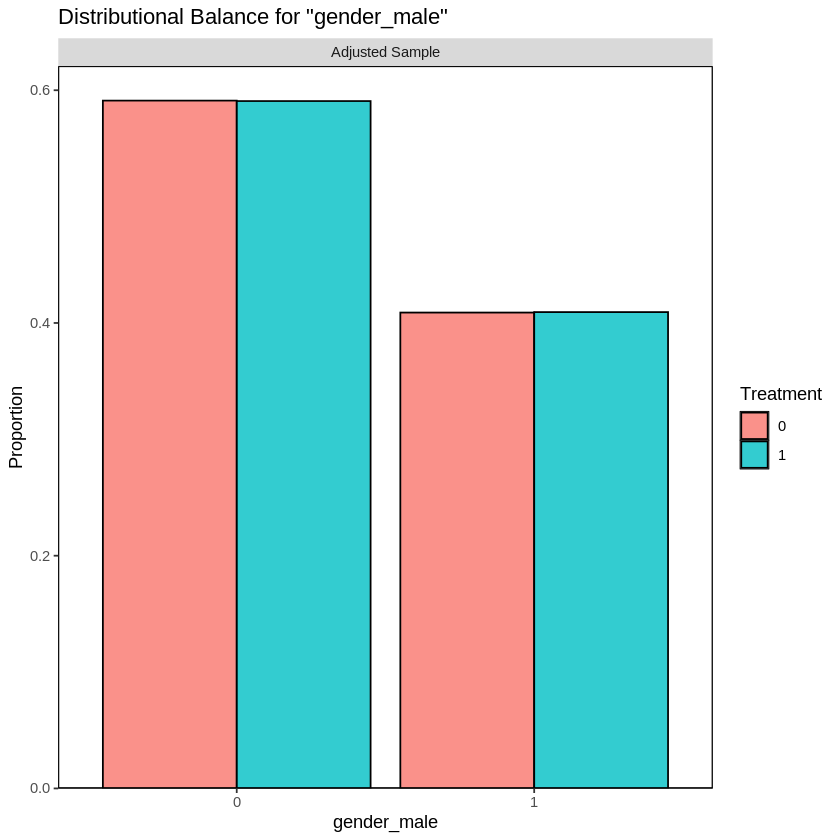

In [ ]:
bal.plot(w.out, var.name = "gender_male")

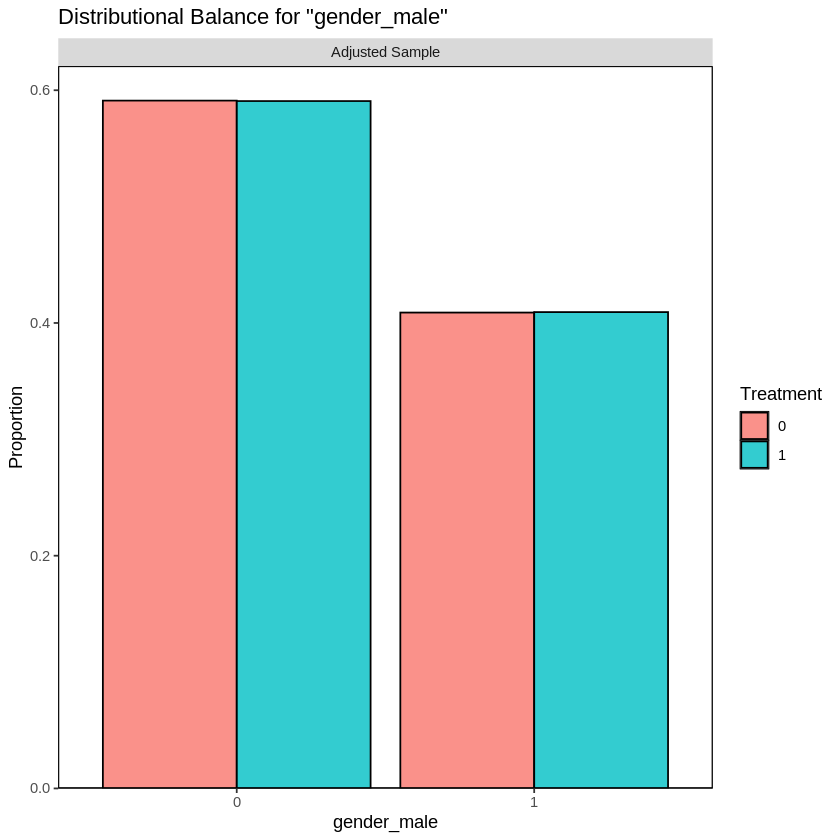

In [ ]:
bal.plot(w.out, var.name = "gender_male")

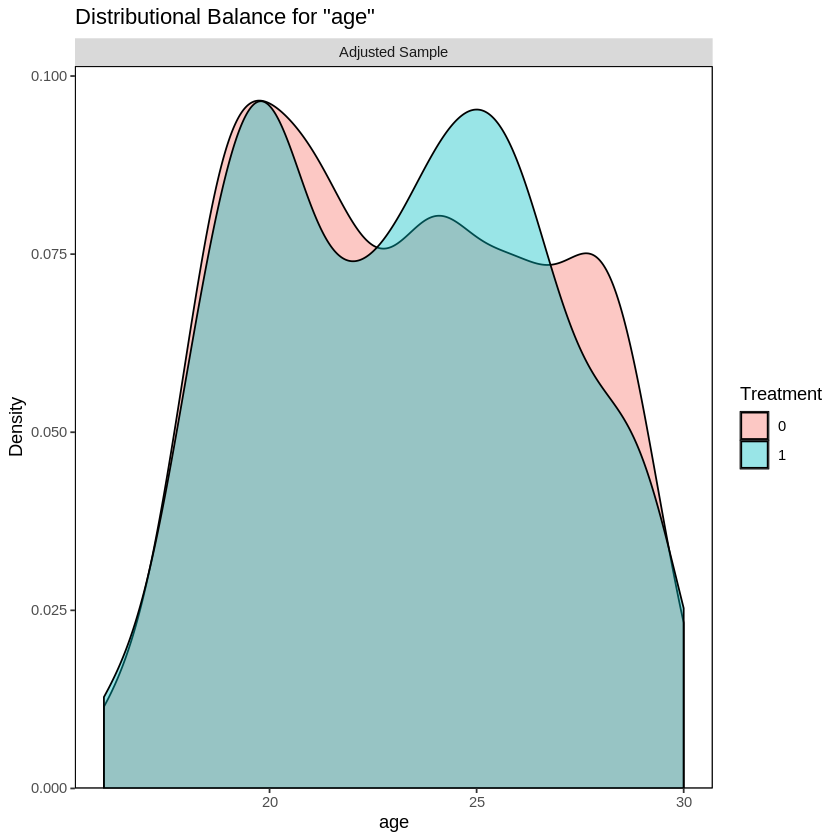

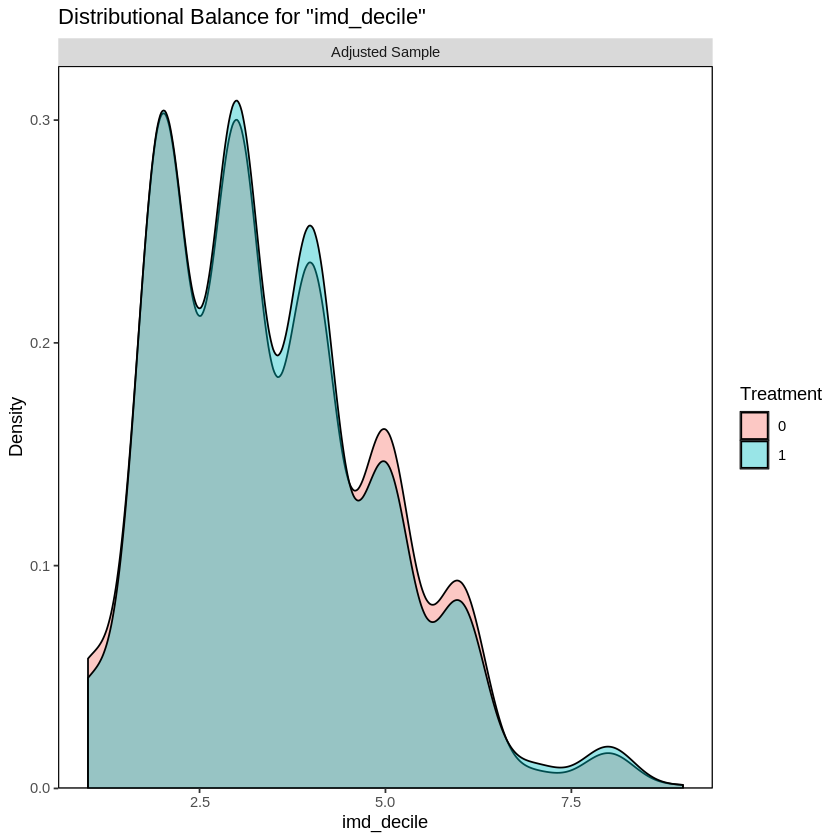

In [ ]:
bal.plot(w.out, var.name = "age")
bal.plot(w.out, var.name = "imd_decile")

We can see a higher percentage of participants aged between 23 and 27 in the treatment group. Also, there is a higher perceptange of participants aged between 21 and 22 and 27 and 29 in the control group.
In the case of the IMD decile, an index that measures poverty in the UK, we can see the same proportion of participants in each group.

### 2. Linear Regression analysis

#### 2.1. Regression 1: $y = \beta_0 + \beta_1 T + \epsilon$   (Vale)

In [ ]:
lm(formula = y ~ w, data = data)


Call:
lm(formula = y ~ w, data = data)

Coefficients:
(Intercept)            w  
     0.2115       0.2652  


#### 2.2. Regression 2: $y = \beta_0 + \beta_1 T + \beta_2 X + \epsilon$  (vale)

In [ ]:
lm(formula = y ~ w + age + gender_female + ethnicgrp_white + ethnicgrp_black + ethnicgrp_mixed_multiple + partners1 + postlaunch + imd_decile, data = data)


Call:
lm(formula = y ~ w + age + gender_female + ethnicgrp_white + 
    ethnicgrp_black + ethnicgrp_mixed_multiple + partners1 + 
    postlaunch + imd_decile, data = data)

Coefficients:
             (Intercept)                         w                       age  
               -0.163972                  0.255827                  0.012437  
           gender_female           ethnicgrp_white           ethnicgrp_black  
                0.092892                  0.049888                 -0.039745  
ethnicgrp_mixed_multiple                 partners1                postlaunch  
               -0.035726                 -0.059088                  0.077025  
              imd_decile  
               -0.004108  


#### 2.3.



#### 2.4.

### 3. Non-Linear Methods DML

In [ ]:
rm(list=ls())
DML <- as.data.frame(read.table('/content/processed_esti.csv', header=T ,sep=","))
#DML <- as.data.frame(read.table("C:/Users/Erzo/Documents/GitHub/CausalAI-Course/data/processed_esti.csv", header=T ,sep=","))

set.seed(1234)
training <- sample(nrow(DML), nrow(DML)*(3/4), replace=FALSE)
data_train <- DML[training,]
data_test <- DML[-training,]
Y_test <- data_test$y

y = as.matrix(data_train[,1])         # outcome: growth rate
d = as.matrix(data_train[,2])         # treatment: initial wealth
x = as.matrix(data_train[,-c(1,2)]) # controls: country characteristics

### DML function for Regression tree

In [ ]:
DML2.for.PLM.tree <- function(data_train, dreg, yreg, nfold=10) {
  nobs <- nrow(data_train) #number of observations
  foldid <- rep.int(1:nfold,times = ceiling(nobs/nfold))[sample.int(nobs)] #define folds indices
  I <- split(1:nobs, foldid)  #split observation indices into folds
  ytil <- dtil <- rep(NA, nobs)
  cat("fold: ")
  for(b in 1:length(I)){
    datitanow=data_train[-I[[b]],-c(2)]
    datitanoy=data_train[-I[[b]],-c(1)]
    datitanowpredict=data_train[I[[b]],-c(2)]
    datitanoypredict=data_train[I[[b]],-c(1)]

    dfit <- dreg(datitanoy) #take a fold out
    yfit <- yreg(datitanow) # take a foldt out
    dhat <- predict(dfit, datitanoypredict ) #predict the left-out fold
    yhat <- predict(yfit, datitanowpredict ) #predict the left-out fold
    dtil[I[[b]]] <- (d[I[[b]]] - dhat) #record residual for the left-out fold
    ytil[I[[b]]] <- (y[I[[b]]] - yhat) #record residial for the left-out fold
    cat(b," ")
  }
  rfit <- lm(ytil ~ dtil)    #estimate the main parameter by regressing one residual on the other
  coef.est <- coef(rfit)[2]  #extract coefficient
  se <- sqrt(vcovHC(rfit)[2,2]) #record robust standard error
  cat(sprintf("\ncoef (se) = %g (%g)\n", coef.est , se))  #printing output
  return( list(coef.est =coef.est , se=se, dtil=dtil, ytil=ytil) ) #save output and residuals
}

### DML function for Boosting Trees

In [ ]:
DML2.for.PLM.boosttree <- function(data_train, dreg, yreg, nfold=10) {
  nobs <- nrow(data_train) #number of observations
  foldid <- rep.int(1:nfold,times = ceiling(nobs/nfold))[sample.int(nobs)] #define folds indices
  I <- split(1:nobs, foldid)  #split observation indices into folds
  ytil <- dtil <- rep(NA, nobs)
  cat("fold: ")
  for(b in 1:length(I)){
    datitanow=data_train[-I[[b]],-c(2)]
    datitanoy=data_train[-I[[b]],-c(1)]
    datitanowpredict=data_train[I[[b]],-c(2)]
    datitanoypredict=data_train[I[[b]],-c(1)]

    dfit <- dreg(datitanoy) #take a fold out
    best.boostt  <- gbm.perf(dfit, plot.it = FALSE) # cross-validation to determine when to stop
    yfit <- yreg(datitanow) # take a foldt out
    best.boosty  <- gbm.perf(yfit, plot.it = FALSE) # cross-validation to determine when to stop
    dhat <- predict(dfit, datitanoypredict, n.trees=best.boostt)
    yhat <- predict(yfit, datitanowpredict, n.trees=best.boosty) #predict the left-out fold
    dtil[I[[b]]] <- (d[I[[b]]] - dhat) #record residual for the left-out fold
    ytil[I[[b]]] <- (y[I[[b]]] - yhat) #record residial for the left-out fold
    cat(b," ")
  }
  rfit <- lm(ytil ~ dtil)    #estimate the main parameter by regressing one residual on the other
  coef.est <- coef(rfit)[2]  #extract coefficient
  se <- sqrt(vcovHC(rfit)[2,2]) #record robust standard error
  cat(sprintf("\ncoef (se) = %g (%g)\n", coef.est , se))  #printing output
  return( list(coef.est =coef.est , se=se, dtil=dtil, ytil=ytil) ) #save output and residuals
}

### DML function for Lasso and Random Forest

In [ ]:
DML2.for.PLM <- function(x, d, y, dreg, yreg, nfold=10) {
  nobs <- nrow(x) #number of observations
  foldid <- rep.int(1:nfold,times = ceiling(nobs/nfold))[sample.int(nobs)] #define folds indices
  I <- split(1:nobs, foldid)  #split observation indices into folds
  ytil <- dtil <- rep(NA, nobs)
  cat("fold: ")
  for(b in 1:length(I)){
    dfit <- dreg(x[-I[[b]],], d[-I[[b]]]) #take a fold out
    yfit <- yreg(x[-I[[b]],], y[-I[[b]]]) # take a foldt out
    dhat <- predict(dfit, x[I[[b]],], type="response") #predict the left-out fold
    yhat <- predict(yfit, x[I[[b]],], type="response") #predict the left-out fold
    dtil[I[[b]]] <- (d[I[[b]]] - dhat) #record residual for the left-out fold
    ytil[I[[b]]] <- (y[I[[b]]] - yhat) #record residial for the left-out fold
    cat(b," ")
  }
  rfit <- lm(ytil ~ dtil)    #estimate the main parameter by regressing one residual on the other
  coef.est <- coef(rfit)[2]  #extract coefficient
  se <- sqrt(vcovHC(rfit)[2,2]) #record robust standard error
  cat(sprintf("\ncoef (se) = %g (%g)\n", coef.est , se))  #printing output
  return( list(coef.est =coef.est , se=se, dtil=dtil, ytil=ytil) ) #save output and residuals
}

#### 3.1. Lasso

In [ ]:
cat(sprintf("\nDML with Lasso \n"))
dreg_lasso <- function(x,d){ rlasso(x,d, post=FALSE) } #ML method= lasso from hdm
yreg_lasso <- function(x,y){ rlasso(x,y, post=FALSE) } #ML method = lasso from hdm
DML2.lasso = DML2.for.PLM(x, d, y, dreg_lasso, yreg_lasso, nfold=10)

coef_lasso<-as.numeric(DML2.lasso$coef.est)
se_lasso<-as.numeric(DML2.lasso$se)
prRes_lassoD<- c(mean((DML2.lasso$dtil)^2));
prRes_lassoY<- c(mean((DML2.lasso$ytil)^2));
prRes_lasso<- rbind(coef_lasso,se_lasso,sqrt(prRes_lassoD), sqrt(prRes_lassoY));
rownames(prRes_lasso)<- c("Estimate","Standard Error","RMSE D", "RMSE Y");
colnames(prRes_lasso)<- c("Lasso")
prRes_lasso


DML with Lasso 
fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.251305 (0.0251121)


,Lasso
Estimate,0.25130463
Standard Error,0.02511208
RMSE D,0.49838689
RMSE Y,0.47164198


The message treatment providing information about Internet-accessed sexually transmitted
infection testing predicts an increase in the probability that a person will get tested
by 25.13 percentage points compared to receiving information about nearby clinics offering
in-person testing.
By providing both groups with information about testing, we mitigate the potential reminder
effect, as both groups are equally prompted to consider testing. This approach allows us to
isolate the impact of the type of information "Internet-accessed testing" versus "in-person clinic
testing" on the likelihood of getting tested. Through randomized assignment, we establish causality
rather than mere correlation, confirming that the intervention's effect is driven by the unique
advantages of Internet-accessed testing, such as increased privacy, reduced embarrassment, and
convenience

#### 3.2. Regression Trees

In [ ]:
# Tree
X_basic <-  "gender_transgender + ethnicgrp_asian + ethnicgrp_black + ethnicgrp_mixed_multiple+ ethnicgrp_other + ethnicgrp_white + partners1 + postlaunch + msm + age+ imd_decile"
y_form_tree <- as.formula(paste("y", "~", X_basic))
t_form_tree <- as.formula(paste("w", "~", X_basic))
yreg_tree <- function(dataa){rpart(y_form_tree, dataa, minbucket=5, cp = 0.001)}
treg_tree <- function(dataa){rpart(t_form_tree, dataa, minbucket=5, cp = 0.001)}
DML2.tree = DML2.for.PLM.tree(data_train, treg_tree, yreg_tree, nfold=10)

coef_tree<-as.numeric(DML2.tree$coef.est)
se_tree<-as.numeric(DML2.tree$se)
prRes_treeD<- c(mean((DML2.tree$dtil)^2));
prRes_treeY<- c(mean((DML2.tree$ytil)^2));
prRes_tree<- rbind(coef_tree,se_tree,sqrt(prRes_treeD), sqrt(prRes_treeY));
rownames(prRes_tree)<- c("Estimate","Standard Error","RMSE D", "RMSE Y");
colnames(prRes_tree)<- c("Regression Tree")
prRes_tree

fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.230801 (0.0238868)


,Regression Tree
Estimate,0.2308014
Standard Error,0.0238868
RMSE D,0.5348227
RMSE Y,0.4918633


The message treatment providing information about Internet-accessed sexually transmitted
infection testing predicts an increase in the probability that a person will get tested
by 23.08 percentage points compared to receiving information about nearby clinics offering
in-person testing.
By providing both groups with information about testing, we mitigate the potential reminder
effect, as both groups are equally prompted to consider testing. This approach allows us to
isolate the impact of the type of information "Internet-accessed testing" versus "in-person clinic
testing" on the likelihood of getting tested. Through randomized assignment, we establish causality
rather than mere correlation, confirming that the intervention's effect is driven by the unique
advantages of Internet-accessed testing, such as increased privacy, reduced embarrassment, and
convenience

#### 3.3. Boosting Trees

In [ ]:
yreg_treeboost<- function(dataa){gbm(y_form_tree, data=dataa, distribution= "gaussian", bag.fraction = .5, interaction.depth=2, n.trees=1000, shrinkage=.01)}
treg_treeboost<- function(dataa){gbm(t_form_tree, data=dataa, distribution= "gaussian", bag.fraction = .5, interaction.depth=2, n.trees=1000, shrinkage=.01)}
DML2.boosttree = DML2.for.PLM.boosttree(data_train, treg_treeboost, yreg_treeboost, nfold=10)

coef_boosttree<-as.numeric(DML2.boosttree$coef.est)
se_boosttree<-as.numeric(DML2.boosttree$se)
prRes_boosttreeD<- c(mean((DML2.boosttree$dtil)^2));
prRes_boosttreeY<- c(mean((DML2.boosttree$ytil)^2));
prRes_boosttree<- rbind(coef_boosttree,se_boosttree,sqrt(prRes_boosttreeD), sqrt(prRes_boosttreeY));
rownames(prRes_boosttree)<- c("Estimate","Standard Error","RMSE D", "RMSE Y");
colnames(prRes_boosttree)<- c("Regression Tree")
prRes_boosttree

fold: 

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



1  

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



2  

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



3  

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



4  

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



5  

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



6  

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



7  

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



8  

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



9  

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



10  
coef (se) = 0.252844 (0.0250923)


,Regression Tree
Estimate,0.25284448
Standard Error,0.02509228
RMSE D,0.49837344
RMSE Y,0.47241960


The message treatment providing information about Internet-accessed sexually transmitted
infection testing predicts an increase in the probability that a person will get tested
by 25.28 percentage points compared to receiving information about nearby clinics offering
in-person testing.
By providing both groups with information about testing, we mitigate the potential reminder
effect, as both groups are equally prompted to consider testing. This approach allows us to
isolate the impact of the type of information "Internet-accessed testing" versus "in-person clinic
testing" on the likelihood of getting tested. Through randomized assignment, we establish causality
rather than mere correlation, confirming that the intervention's effect is driven by the unique
advantages of Internet-accessed testing, such as increased privacy, reduced embarrassment, and
convenience

#### 3.4. Random Forest

In [ ]:
cat(sprintf("\nDML with Random Forest \n"))
dreg <- function(x,d){ randomForest(x, d) } #ML method=Forest
yreg <- function(x,y){ randomForest(x, y) } #ML method=Forest
DML2.RF = DML2.for.PLM(x, d, y, dreg, yreg, nfold=10)

coef_RF<-as.numeric(DML2.RF$coef.est)
se_RF<-as.numeric(DML2.RF$se)
prRes_RFD<- c(mean((DML2.RF$dtil)^2));
prRes_RFY<- c(mean((DML2.RF$ytil)^2));
prRes_RF<- rbind(coef_RF,se_RF,sqrt(prRes_RFD), sqrt(prRes_RFY));
rownames(prRes_RF)<- c("Estimate","Standard Error","RMSE D", "RMSE Y");
colnames(prRes_RF)<- c("Random Forest")
prRes_RF


DML with Random Forest 
fold: 

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


1  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


2  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


3  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


4  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


5  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


6  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


7  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


8  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


9  

Warning message in randomForest.default(x, d):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(x, y):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


10  
coef (se) = 0.23865 (0.024669)


,Random Forest
Estimate,0.23864993
Standard Error,0.02466897
RMSE D,0.50546486
RMSE Y,0.46976308


The message treatment providing information about Internet-accessed sexually transmitted
infection testing predicts an increase in the probability that a person will get tested
by 24.14 percentage points compared to receiving information about nearby clinics offering
in-person testing.
By providing both groups with information about testing, we mitigate the potential reminder
effect, as both groups are equally prompted to consider testing. This approach allows us to
isolate the impact of the type of information "Internet-accessed testing" versus "in-person clinic
testing" on the likelihood of getting tested. Through randomized assignment, we establish causality
rather than mere correlation, confirming that the intervention's effect is driven by the unique
advantages of Internet-accessed testing, such as increased privacy, reduced embarrassment, and
convenience

#### 3.5. Table and Coefficient plot

##### Table

##### Coefficient Plot

In [ ]:
prRes.D<- c( mean((DML2.lasso$dtil)^2), mean((DML2.tree$dtil)^2), mean((DML2.boosttree$dtil)^2), mean((DML2.RF$dtil)^2));
prRes.Y<- c(mean((DML2.lasso$ytil)^2), mean((DML2.tree$ytil)^2),mean((DML2.boosttree$ytil)^2),mean((DML2.RF$ytil)^2));
prRes<- rbind(sqrt(prRes.D), sqrt(prRes.Y));
rownames(prRes)<- c("RMSE D", "RMSE Y");
colnames(prRes)<- c("Lasso", "Reg Tree", "Boost Tree", "Random Forest")

table <- matrix(0,4,4)
# Point Estimate
table[1,1] <- as.numeric(DML2.lasso$coef.est)
table[2,1] <- as.numeric(DML2.tree$coef.est)
table[3,1] <- as.numeric(DML2.boosttree$coef.est)
table[4,1]   <- as.numeric(DML2.RF$coef.est)
# SE
table[1,2] <- as.numeric(DML2.lasso$se)
table[2,2] <- as.numeric(DML2.tree$se)
table[3,2] <- as.numeric(DML2.boosttree$se)
table[4,2]   <- as.numeric(DML2.RF$se)
# RMSE Y
table[1,3] <- as.numeric(prRes[2,1])
table[2,3] <- as.numeric(prRes[2,2])
table[3,3] <- as.numeric(prRes[2,3])
table[4,3]   <- as.numeric(prRes[2,4])
# RMSE D
table[1,4] <- as.numeric(prRes[1,1])
table[2,4] <- as.numeric(prRes[1,2])
table[3,4] <- as.numeric(prRes[1,3])
table[4,4]   <- as.numeric(prRes[1,4])
# print results
colnames(table) <- c("Estimate","Standard Error", "RMSE Y", "RMSE D")
rownames(table) <- c("Lasso", "Reg Tree", "Boost Tree", "Random Forest")
table

,Estimate,Standard Error,RMSE Y,RMSE D
Lasso,0.2513046,0.02511208,0.4716420,0.4983869
Reg Tree,0.2308014,0.02388680,0.4918633,0.5348227
Boost Tree,0.2528445,0.02509228,0.4724196,0.4983734
Random Forest,0.2386499,0.02466897,0.4697631,0.5054649


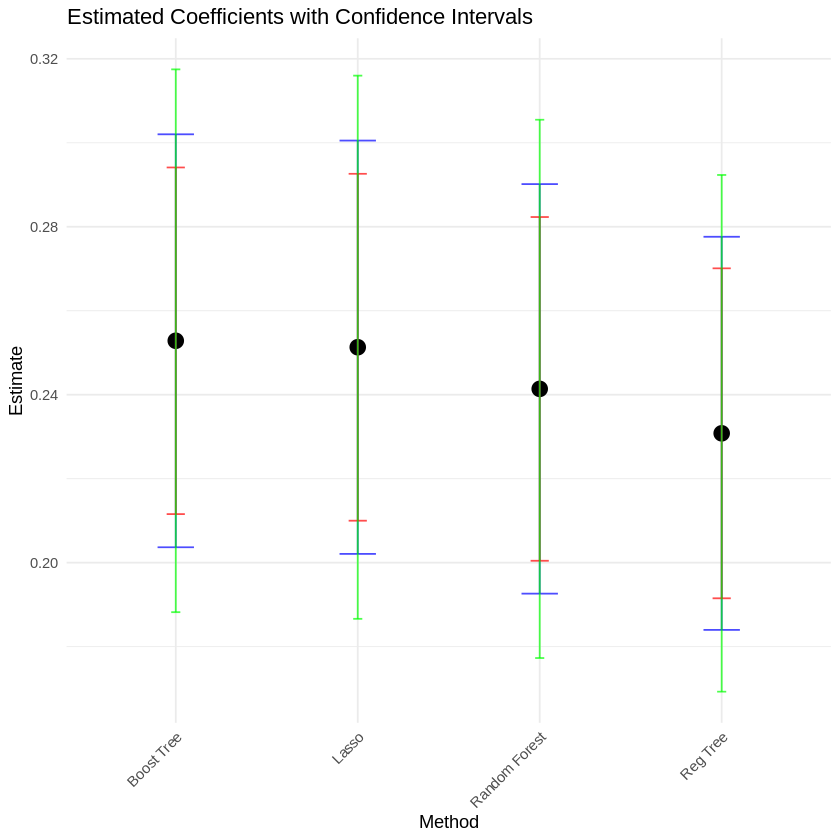

In [ ]:
table_ci<-as.data.frame(table)
table_ci$CI_Lower_1 <- table_ci$Estimate - 2.576 * table_ci$'Standard Error'
table_ci$CI_Upper_1 <- table_ci$Estimate + 2.576 * table_ci$'Standard Error'
table_ci$CI_Lower_5 <- table_ci$Estimate - 1.96 * table_ci$'Standard Error'
table_ci$CI_Upper_5 <- table_ci$Estimate + 1.96 * table_ci$'Standard Error'
table_ci$CI_Lower_10 <- table_ci$Estimate - 1.645 * table_ci$'Standard Error'
table_ci$CI_Upper_10 <- table_ci$Estimate + 1.645 * table_ci$'Standard Error'

ggplot(table_ci, aes(x = rownames(table_ci), y = Estimate)) +
  geom_point(size = 4) +
  geom_errorbar(aes(ymin = CI_Lower_5, ymax = CI_Upper_5), width = 0.2, color = "blue", alpha = 0.7) +
  geom_errorbar(aes(ymin = CI_Lower_10, ymax = CI_Upper_10), width = 0.1, color = "red", alpha = 0.7) +
  geom_errorbar(aes(ymin = CI_Lower_1, ymax = CI_Upper_1), width = 0.05, color = "green", alpha = 0.7) +
  labs(title = "Estimated Coefficients with Confidence Intervals",
       y = "Estimate",
       x = "Method") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### 3.6. Model

To choose the best model, we must compare the RMSEs of the outcome variable Y. In this case, the model with the lowest RMSE for Y
is generated by Lasso (0.4716420), whereas the lowest for the treatment is generated by Boosting Trees (0.4983734). Therefore, DML
could be employed with Y cleaned using Lasso and the treatment using Boosting Trees.